### Importing Libraries:
The yfinance library allows us to download market data from Yahoo Finance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

### Define a Function to get required data

In [ ]:
def get_data(stocks, start, end):
    stock_data = yf.download(stocks, start, end)
    stock_data = stock_data['Close']
    returns = stock_data.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return mean_returns, cov_matrix

### List of Stocks to Use
These are stocks on the australian stock exchange that I'm using for no particular reason.

In [ ]:
stock_list = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock + '.AX' for stock in stock_list]

### Define Start and End Date for Stock Data

In [ ]:
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=300)

### Downloading the Data

In [ ]:
mean_returns, cov_matrix = get_data(stocks, start_date, end_date)

[*********************100%***********************]  6 of 6 completed


### Defining the weights for each stock

In [ ]:
weights = np.random.random(len(mean_returns))
weights /= np.sum(weights)

### Monte Carlo Method

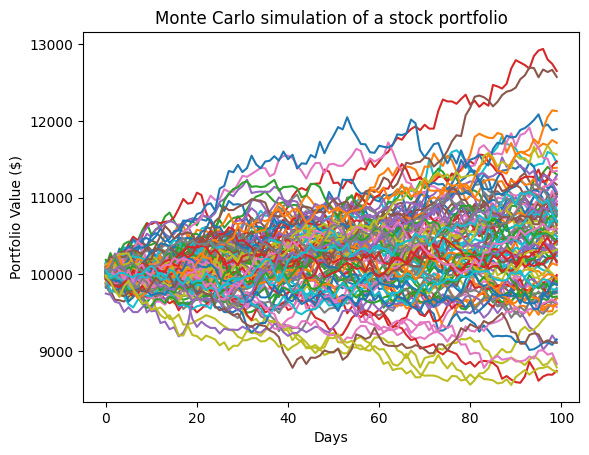

In [ ]:
mc_sims = 100 # Number of sims
T = 100 # Timeframe (days)

mean_matrix = np.full(shape=(T, len(weights)), fill_value=mean_returns)
mean_matrix = mean_matrix.T # Taking the transpose
# Matrix with T columns for each stock and each stock(row) containing the same value of the stock's mean return.

portfolio_sims = np.full(shape=(T, mc_sims), fill_value = 0.0)

initial_portfolio = 10000

for m in range(0, mc_sims):
    Z=np.random.normal(size=(T, len(weights)))
    L=np.linalg.cholesky(cov_matrix)
    daily_returns = mean_matrix + np.inner(L, Z)
    portfolio_sims[:, m] = np.cumprod(np.inner(weights, daily_returns.T) + 1)*initial_portfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte Carlo simulation of a stock portfolio')
plt.show()